# **MODELISATION**




**Importation des packages**

In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.preprocessing import StandardScaler

Importation des données

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/OusseynouDIOP16/IML_STUDENT_PERFORMANCE/main/data_clean.csv", sep=",")
data.shape  # data frame dimensions (nb rows, nb columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hours_Studied                       6607 non-null   float64
 1   Attendance                          6607 non-null   int64  
 2   Sleep_Hours                         6607 non-null   int64  
 3   Previous_Scores                     6607 non-null   int64  
 4   Tutoring_Sessions                   6607 non-null   float64
 5   Physical_Activity                   6607 non-null   int64  
 6   Exam_Score                          6607 non-null   float64
 7   Access_to_Resources_Encoded         6607 non-null   int64  
 8   Parental_Involvement_Encoded        6607 non-null   int64  
 9   Motivation_Level_Encoded            6607 non-null   int64  
 10  Family_Income_Encoded               6607 non-null   int64  
 11  Teacher_Quality_Encoded             6607 no

**Définition des données d'entrainement et données test**

In [4]:
# Liste des variables explicatives
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
            'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Encoded',
            'Access_to_Resources_Encoded', 'Motivation_Level_Encoded', 'Family_Income_Encoded',
            'Teacher_Quality_Encoded', 'Extracurricular_Activities_Encoded',
            'Internet_Access_Encoded', 'Learning_Disabilities_Encoded',
            'School_Type_Encoded', 'Peer_Influence_Encoded',
            'Parental_Education_Level_Encoded', 'Distance_from_Home_Encoded', 'Gender_Encoded']

# Variable cible
target = 'Exam_Score'

# Séparation des variables X (features) et y (target)
X = data[features]  # Variables explicatives
y = data[target]    # Variable cible

# Vérification des premières lignes des deux DataFrames
print("Variables explicatives X :\n", X.head())
print("\nVariable cible y :\n", y.head())

Variables explicatives X :
    Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0           23.0          84            7               73                0.0   
1           19.0          64            8               59                2.0   
2           24.0          98            7               91                2.0   
3           29.0          89            8               98                1.0   
4           19.0          92            6               65                3.0   

   Physical_Activity  Parental_Involvement_Encoded  \
0                  3                             1   
1                  4                             1   
2                  4                             2   
3                  4                             1   
4                  4                             2   

   Access_to_Resources_Encoded  Motivation_Level_Encoded  \
0                            3                         1   
1                            2          

In [5]:
# 20% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #ramdom_state trés important

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (5285, 19) ; y: (5285,) 
Test set - X: (1322, 19) ; y: (1322,)


# **STANDARDISATION**

In [6]:

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation sur X_train et X_test
X_train_std = scaler.fit_transform(X_train)  # Calcul et transformation sur le train
X_test_std= scaler.transform(X_test)       # Transformation du test avec les mêmes paramètres

In [7]:
# Initialiser le scaler
y_scaler = StandardScaler()

# Reshaper les données en utilisant .values pour obtenir un array NumPy
y_train= y_scaler.fit_transform(y_train.values.reshape(-1, 1))  # Standardisation sur le train
y_test = y_scaler.transform(y_test.values.reshape(-1, 1))  # Application sur le test

# Vérification des résultats
print("Moyenne de y_train_scaled :", y_train.mean())
print("Écart-type de y_train_scaled :", y_test.std())

Moyenne de y_train_scaled : -1.1431200777294705e-15
Écart-type de y_train_scaled : 1.0109840800796572


# **Modèle 1 : Regression lineare multiple**



In [8]:
# On crée un modèle de régression linéaire
rlm = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
rlm.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
rlm_error = np.mean((rlm.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(f"Erreur quadratrique: {rlm_error}")
score=rlm.score(X_train, y_train)
print (f"Score: {score}")

Erreur quadratrique: 0.09171745599383915
Score: 0.9044603626839474


Déterminon B0 et les poids des variables explicatives


In [9]:
print("Intercept:", rlm.intercept_)
print("Coefficients:", rlm.coef_)
coefficients = rlm.coef_

Intercept: [-10.62028326]
Coefficients: [[ 8.48274750e-02  5.87916773e-02  2.28899972e-03  1.45302738e-02
   1.41511444e-01  6.30104906e-02  2.83535574e-01  2.93407497e-01
   1.49466077e-01  1.36907803e-01  1.41877113e-01  1.44467133e-01
   2.96141023e-01 -2.63871726e-01 -2.65607656e-04  1.48152337e-01
   1.50475938e-01 -1.32978986e-01 -9.81998826e-03]]


# **Prédiction**

In [10]:
y_train_pred = rlm.predict(X_train)
y_test_pred = rlm.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
score_test=rlm.score(X_test, y_test)
print (f"Score test: {score_test}")

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")


Score test: 0.9102646902296295
Train MSE: 0.0955396373160527, Test MSE: 0.09171745599383915


les deux MSE sont proches, ce qui suggère que le modèle est bien équilibré.

In [12]:
train_r2 = rlm.score(X_train, y_train)
test_r2 = rlm.score(X_test, y_test)

print(f"Train R²: {train_r2}, Test R²: {test_r2}")


Train R²: 0.9044603626839474, Test R²: 0.9102646902296295


**Analyse des résidus**

Analyse des Résidus pour vérifier si les hypothèses de la régression linéaire sont respectées :

*   Les résidus doivent suivre une distribution normale.

*   Ils doivent être indépendants
*   Ils doivent avoir une variance constante (homoscédasticité).

.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


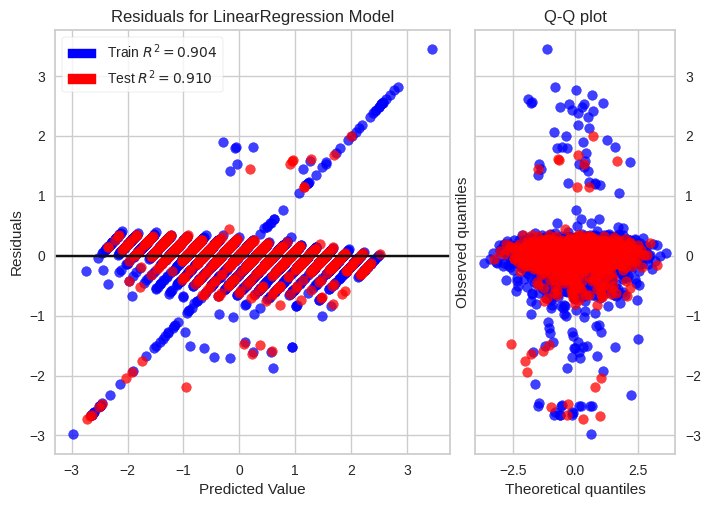

<Figure size 800x550 with 0 Axes>

In [13]:
from yellowbrick.regressor import ResidualsPlot
res_viz = ResidualsPlot(rlm,
                        is_fitted="auto",
                        qqplot=True,
                        hist=False,
                        train_color="blue",
                        test_color="red",
                       )
res_viz.fit(X_train, y_train)
res_viz.score(X_test, y_test)
res_viz.show(clear_figure=True);

**Hypothèse** : Les résidus doivent être répartis aléatoirement autour de 0 (pas de structure discernable).

Analyse (graphe de gauche - Résidus vs Valeurs Prédites) :

Les résidus semblent être répartis autour de la ligne 0, ce qui suggère une relation linéaire raisonnable.
Cependant, il existe quelques valeurs aberrantes en bas (-3 et 3), ce qui pourrait indiquer des observations influentes.

**Conclusion** :
✔️ Hypothèse de linéarité globalement vérifiée, bien que des points aberrants soient présents.


**Hypothèse** : La variance des résidus doit être constante pour toutes les valeurs prédites (pas de cône ou de motif discernable).

Analyse (graphe de gauche) :

Les résidus sont proches de 0 pour la plupart des prédictions, mais il  y a une légère augmentation de la dispersion pour les prédictions extrêmes (surtout pour les petites valeurs).
Cela pourrait indiquer une légère hétéroscédasticité.

**Conclusion :**
⚠️ Hypothèse partiellement vérifiée, mais une légère hétéroscédasticité est présente.

**Hypothèse :** Les résidus doivent suivre une distribution normale

Analyse (Q-Q Plot - graphe de droite) :

Les points suivent une ligne droite au centre du graphe, ce qui suggère une bonne normalité pour les valeurs centrales.
Cependant, aux extrémités (queues de la distribution), on observe des écarts significatifs.

**Conclusion :**
⚠️ Hypothèse partiellement vérifiée, mais des écarts aux extrémités montrent une non-normalité des résidus.

### **Normalité**

Une `p-value < alpha` (5%, en général) pour le test d'Anderson-Darling indique que l'hypothèse nulle de normalité de la distribution des résidus est rejetée

**Hypothèses du test :**

H₀ (Hypothèse nulle) : Les résidus suivent une distribution normale.

H₁ (Hypothèse alternative) : Les résidus ne suivent pas une distribution normale.

**p-value :**

Si la p-value > 0.05 : On accepte H₀, les résidus suivent une distribution normale.

Si la p-value ≤ 0.05 : On rejette H₀, les résidus ne suivent pas une distribution normale.


In [14]:
from scipy.stats import normaltest

# Importer le module pour le test d'Anderson-Darling
from statsmodels.stats.diagnostic import normal_ad

# Calcul des résidus (différence entre les valeurs observées et prédites)
residuals = y_train - y_train_pred

# Appliquer le test sur les résidus
ad_stat, p_value = normal_ad(residuals)

# Afficher les résultats
print("La statistique d'Anderson-Darling vaut :", ad_stat)
print("La p-value du test d'Anderson-Darling vaut :", p_value)

# Interprétation
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les résidus ne suivent pas une distribution normale (on rejette H0).")




La statistique d'Anderson-Darling vaut : [inf]
La p-value du test d'Anderson-Darling vaut : 0.0
Les résidus ne suivent pas une distribution normale (on rejette H0).


## **Homoscedasticite**

**Hypothèses du test :**

H₀ (Hypothèse nulle) : Les résidus sont homoscédastiques (la variance est constante).

H₁ (Hypothèse alternative) : Les résidus sont hétéroscédastiques (la variance n'est pas constante).

In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Ajouter une constante à X_train pour inclure l'ordonnée à l'origine dans le test
X_train_with_const = sm.add_constant(X_train)

# Appliquer le test de White
white_test_stat, white_p_value, _, _ = het_white(residuals, X_train_with_const)

# Afficher les résultats
print("Statistique du test de White:", white_test_stat)
print("p-value du test de White:", white_p_value)

# Interprétation
if white_p_value > 0.05:
    print("Il n'y a pas d'hétéroscédasticité (on ne rejette pas H0).")
else:
    print("Il y a de l'hétéroscédasticité (on rejette H0).")


Statistique du test de White: 1137.5953051003878
p-value du test de White: 2.1648652831664345e-129
Il y a de l'hétéroscédasticité (on rejette H0).


## **Multicolinéarité**

La multicolinéarité se produit lorsque les variables indépendantes sont trop fortement corrélées entre elles.

Le facteur d'inflation de la variance VIF* identifie la corrélation entre les variables indépendantes et la force de cette corrélation. [Si VIF >1 & VIF <5 corrélation modérée, VIF > 5 niveau critique de multicollinéarité.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ajouter une constante pour le modèle
X_train_with_const = sm.add_constant(X_train)

# Calcul du VIF pour chaque variable explicative
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i + 1) for i in range(len(X_train.columns))]

# Affichage des résultats
print(vif_data)


                              Variable       VIF
0                        Hours_Studied  1.002947
1                           Attendance  1.004756
2                          Sleep_Hours  1.003892
3                      Previous_Scores  1.003998
4                    Tutoring_Sessions  1.003598
5                    Physical_Activity  1.004426
6         Parental_Involvement_Encoded  1.004280
7          Access_to_Resources_Encoded  1.003220
8             Motivation_Level_Encoded  1.002114
9                Family_Income_Encoded  1.002773
10             Teacher_Quality_Encoded  1.001312
11  Extracurricular_Activities_Encoded  1.001472
12             Internet_Access_Encoded  1.003519
13       Learning_Disabilities_Encoded  1.003698
14                 School_Type_Encoded  1.003305
15              Peer_Influence_Encoded  1.002323
16    Parental_Education_Level_Encoded  1.003264
17          Distance_from_Home_Encoded  1.001698
18                      Gender_Encoded  1.001920


VIF ≈ 1 : Cela signifie que chaque variable indépendante est pratiquement non corrélée avec les autres variables indépendantes.

### **Conclusion**

**Points positifs :** Le modèle semble robuste vis-à-vis de la multicolinéarité

**Problème :**

La non-normalité des résidus et les points aberrants peuvent affecter les conclusions des tests d'hypothèses.
Il y a pas d'hétéroscédasticité.

# **REGRESION DE RIDGE**

In [17]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge(alpha=1.0) # alpha=1
ridge.fit(X_train, y_train)


Ridge()

In [18]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE (Ridge): {train_mse}, Test MSE (Ridge): {test_mse}")

score_test=ridge.score(X_test, y_test)
score_train=ridge.score(X_train, y_train)
print (f"Score test: {score_test}")
print (f"Score train: {score_train}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")



Train MSE (Ridge): 0.09553973250665394, Test MSE (Ridge): 0.09171909693327761
Score test: 0.9102630847532539
Score train: 0.9044602674933461
Train MSE: 0.09553973250665394, Test MSE: 0.09171909693327761


Le modèle Ridge présente une faible erreur de prédiction tant sur l'ensemble d'entraînement (MSE de 0.0955) que sur l'ensemble de test (MSE de 0.0917), ce qui montre une bonne capacité de généralisation. Le R² élevé sur les deux ensembles (0.904 pour l'entraînement et 0.910 pour le test) indique que le modèle explique bien la variance des données, suggérant une bonne performance globale.

# **Tuning des hyperparamètres-RIDGE**

In [19]:

# Générer un intervalle de valeurs pour alpha
alpha_values = np.linspace(0.1, 10, 50)  # 50 valeurs entre 0.1 et 10

# Initialiser les variables pour stocker les meilleurs résultats
best_alpha = None
best_mse = float('inf')

# Tester chaque valeur d'alpha
for alpha in alpha_values:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Prédictions sur le jeu de test
    y_test_pred = ridge.predict(X_test)

    # Calcul du MSE sur le jeu de test
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"Alpha: {alpha:.2f}, Test MSE: {mse:.4f}")

    # Mettre à jour le meilleur alpha si nécessaire
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Résultats finaux
print(f"Best alpha: {best_alpha:.2f}, Best Test MSE: {best_mse:.4f}")


Alpha: 0.10, Test MSE: 0.0917
Alpha: 0.30, Test MSE: 0.0917
Alpha: 0.50, Test MSE: 0.0917
Alpha: 0.71, Test MSE: 0.0917
Alpha: 0.91, Test MSE: 0.0917
Alpha: 1.11, Test MSE: 0.0917
Alpha: 1.31, Test MSE: 0.0917
Alpha: 1.51, Test MSE: 0.0917
Alpha: 1.72, Test MSE: 0.0917
Alpha: 1.92, Test MSE: 0.0917
Alpha: 2.12, Test MSE: 0.0917
Alpha: 2.32, Test MSE: 0.0917
Alpha: 2.52, Test MSE: 0.0917
Alpha: 2.73, Test MSE: 0.0917
Alpha: 2.93, Test MSE: 0.0917
Alpha: 3.13, Test MSE: 0.0917
Alpha: 3.33, Test MSE: 0.0917
Alpha: 3.53, Test MSE: 0.0917
Alpha: 3.74, Test MSE: 0.0917
Alpha: 3.94, Test MSE: 0.0917
Alpha: 4.14, Test MSE: 0.0917
Alpha: 4.34, Test MSE: 0.0917
Alpha: 4.54, Test MSE: 0.0917
Alpha: 4.75, Test MSE: 0.0917
Alpha: 4.95, Test MSE: 0.0917
Alpha: 5.15, Test MSE: 0.0917
Alpha: 5.35, Test MSE: 0.0917
Alpha: 5.56, Test MSE: 0.0917
Alpha: 5.76, Test MSE: 0.0917
Alpha: 5.96, Test MSE: 0.0917
Alpha: 6.16, Test MSE: 0.0917
Alpha: 6.36, Test MSE: 0.0917
Alpha: 6.57, Test MSE: 0.0917
Alpha: 6.7

Représentation des coeffients

In [20]:
from sklearn.metrics import r2_score
# Entraînement du modèle Ridge
ridge = linear_model.Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

# Obtenir les coefficients du modèle
coefficients = ridge.coef_

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats de l'entraînement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")




Train MSE: 0.09553963827114575
Test MSE: 0.09171761247857765
Train R^2: 0.9044603617288542
Test R^2: 0.9102645371267514


**Validation croisée RIDGE**

Validation Croisée - MSE moyen: 0.09663613995132327
Validation Croisée - R^2 moyen: 0.9032790379446898
Train MSE: 0.09553963827114575
Test MSE: 0.09171761247857765
Train R^2: 0.9044603617288542
Test R^2: 0.9102645371267514


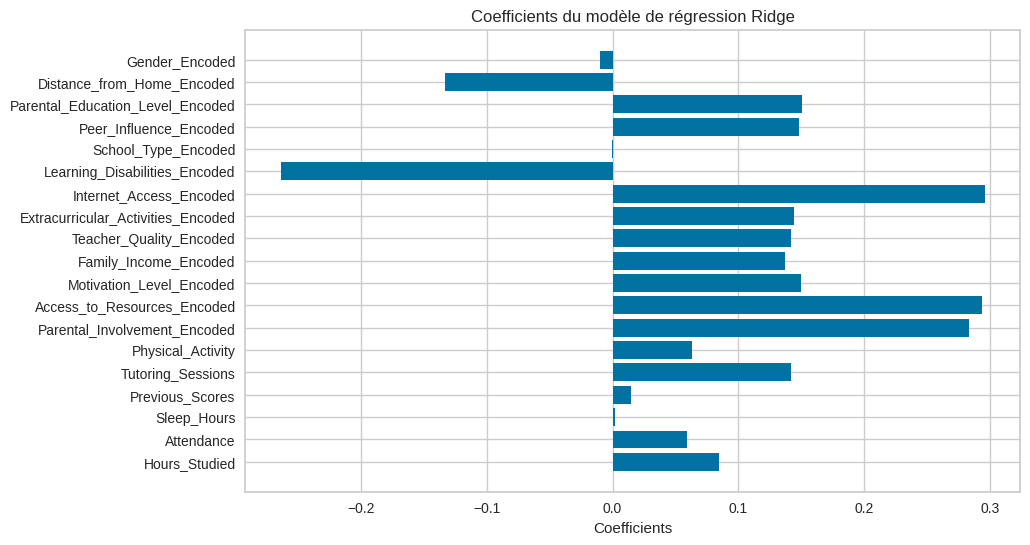

In [21]:

from sklearn.model_selection import cross_val_score
# Entraînement du modèle Ridge avec le meilleur alpha trouvé
ridge = Ridge(alpha=best_alpha)

# Effectuer une validation croisée à 5 plis pour évaluer les performances du modèle
cv_scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

# Résultats de la validation croisée
print(f"Validation Croisée - MSE moyen: {-np.mean(cv_scores_mse)}")
print(f"Validation Croisée - R^2 moyen: {np.mean(cv_scores_r2)}")

# Entraîner à nouveau sur l'ensemble complet pour obtenir les résultats sur l'ensemble d'entraînement et de test
ridge.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculer les MSE et R^2 pour l'entraînement et le test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats de l'entraînement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Creating a bar plot to visualize coefficients
coefficients = ridge.coef_.ravel()  # Flatten the coefficients array
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du modèle de régression Ridge')
plt.show()

Le modèle Ridge présente des résultats solides avec un MSE moyen de 0.0966 lors de la validation croisée, et un R² moyen de 0.903, ce qui indique une bonne capacité de généralisation. Les performances sur l'ensemble d'entraînement (MSE de 0.0955, R² de 0.904) et sur l'ensemble de test (MSE de 0.0917, R² de 0.910) confirment que le modèle offre des prédictions précises et cohérentes.

# **Regressionn de LASSO**

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)#Alpha=1
lasso.fit(X_train, y_train)

Lasso()

In [25]:
# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats de l'entraînement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Train MSE: 0.3164794758398285
Test MSE: 0.3280644751146426
Train R^2: 0.6835205241601715
Test R^2: 0.6790254703418296


Le modèle Lasso présente des résultats moins performants par rapport au modèle Ridge, avec un MSE d'entraînement de 0.316 et un MSE de test de 0.328, ce qui indique un plus grand écart entre les prédictions du modèle et les valeurs réelles. Le R² est également plus faible, atteignant 0.684 pour l'entraînement et 0.679 pour le test, suggérant que le modèle explique moins de variance dans les données par rapport au modèle Ridge.

# **Tuning des hyperparamètres-LASSO**

In [26]:


# Générer un intervalle de valeurs pour alpha
alpha_values = np.linspace(0.01, 10, 50)  # Valeurs entre 0.01 et 10

# Initialiser les variables pour stocker les meilleurs résultats
best_alpha_lasso = None
best_mse_lasso = float('inf')

# Tester chaque valeur d'alpha
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Prédictions sur le jeu de test
    y_test_pred_lasso = lasso.predict(X_test)

    # Calcul du MSE sur le jeu de test
    mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    print(f"Alpha: {alpha:.2f}, Test MSE: {mse_lasso:.4f}")

    # Mettre à jour le meilleur alpha si nécessaire
    if mse_lasso < best_mse_lasso:
        best_mse_lasso = mse_lasso
        best_alpha_lasso = alpha

# Résultats finaux
print(f"Meilleur alpha pour  Lasso: {best_alpha_lasso:.2f}, Meilleur Test MSE pour  Lasso: {best_mse_lasso:.4f}")


Alpha: 0.01, Test MSE: 0.0965
Alpha: 0.21, Test MSE: 0.2821
Alpha: 0.42, Test MSE: 0.2890
Alpha: 0.62, Test MSE: 0.2994
Alpha: 0.83, Test MSE: 0.3133
Alpha: 1.03, Test MSE: 0.3308
Alpha: 1.23, Test MSE: 0.3518
Alpha: 1.44, Test MSE: 0.3763
Alpha: 1.64, Test MSE: 0.4044
Alpha: 1.84, Test MSE: 0.4359
Alpha: 2.05, Test MSE: 0.4710
Alpha: 2.25, Test MSE: 0.5096
Alpha: 2.46, Test MSE: 0.5518
Alpha: 2.66, Test MSE: 0.5975
Alpha: 2.86, Test MSE: 0.6400
Alpha: 3.07, Test MSE: 0.6503
Alpha: 3.27, Test MSE: 0.6599
Alpha: 3.48, Test MSE: 0.6701
Alpha: 3.68, Test MSE: 0.6809
Alpha: 3.88, Test MSE: 0.6924
Alpha: 4.09, Test MSE: 0.7045
Alpha: 4.29, Test MSE: 0.7172
Alpha: 4.50, Test MSE: 0.7306
Alpha: 4.70, Test MSE: 0.7447
Alpha: 4.90, Test MSE: 0.7594
Alpha: 5.11, Test MSE: 0.7747
Alpha: 5.31, Test MSE: 0.7907
Alpha: 5.51, Test MSE: 0.8073
Alpha: 5.72, Test MSE: 0.8245
Alpha: 5.92, Test MSE: 0.8424
Alpha: 6.13, Test MSE: 0.8609
Alpha: 6.33, Test MSE: 0.8801
Alpha: 6.53, Test MSE: 0.9000
Alpha: 6.7

## **Modèle avec notre Best_alpha**


Train MSE: 0.10030892941900742
Test MSE: 0.0964735148399511
Train R^2: 0.8996910705809926
Test R^2: 0.9056114166600853


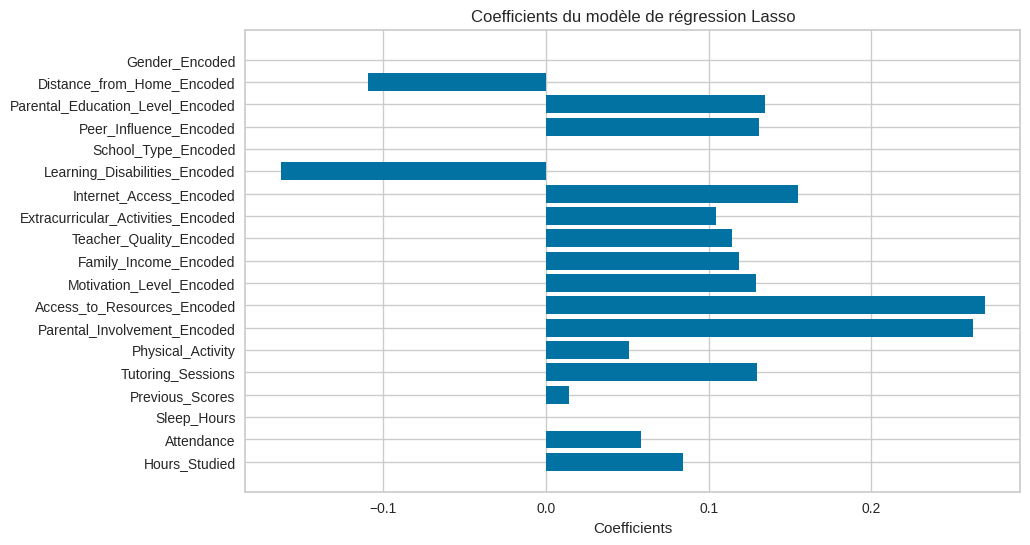

In [27]:
# Entraîner Lasso avec le meilleur alpha trouvé
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)

# Obtenir les coefficients
coefficients_lasso = lasso_best.coef_
lasso_best.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

# Calculer les MSE et R^2
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats de l'entraînement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients_lasso)), coefficients_lasso, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du modèle de régression Lasso')
plt.show()


**Validation croisée LASSO**

In [28]:


# Entraîner Lasso avec le meilleur alpha trouvé
lasso_best = Lasso(alpha=best_alpha_lasso)

# Effectuer une validation croisée à 5 plis pour évaluer les performances du modèle
cv_scores_mse = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='r2')

# Résultats de la validation croisée
print(f"Validation Croisée - MSE moyen: {-np.mean(cv_scores_mse)}")
print(f"Validation Croisée - R^2 moyen: {np.mean(cv_scores_r2)}")

# Entraîner à nouveau sur l'ensemble complet pour obtenir les résultats sur l'ensemble d'entraînement et de test
lasso_best.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement et de test
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

# Calculer les MSE et R^2 pour l'entraînement et le test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les résultats de l'entraînement et du test
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Validation Croisée - MSE moyen: 0.10142725580050165
Validation Croisée - R^2 moyen: 0.8984641066677428
Train MSE: 0.10030892941900742
Test MSE: 0.0964735148399511
Train R^2: 0.8996910705809926
Test R^2: 0.9056114166600853


Après la validation croisée et l'optimisation des hyperparamètres, le modèle Lasso présente des améliorations significatives. Le MSE moyen de la validation croisée est de 0.101, avec un R² moyen de 0.898, indiquant une bonne capacité du modèle à prédire les données. Les performances sur l'ensemble d'entraînement montrent un MSE de 0.100 et un R² de 0.900, tandis que sur l'ensemble de test, le MSE est de 0.096 et le R² atteint 0.906, ce qui montre une excellente capacité de généralisation du modèle.

# **ELASTIC-NET**

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Entraîner Elastic Net avec les meilleurs paramètres
elastic = ElasticNet(alpha=best_alpha, l1_ratio=1.0)
elastic.fit(X_train, y_train)

# Prédictions
y_train_pred = elastic.predict(X_train)
y_test_pred = elastic.predict(X_test)

# Calcul des MSE et R² pour l'ensemble d'entraînement et de test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")

Train MSE: 0.23510066129368534
Test MSE: 0.23653617480675496
Train R²: 0.7648993387063147
Test R²: 0.7685757123528543


Le modèle Elastic Net montre des performances intéressantes avec un MSE d'entraînement de 0.235 et un MSE de test de 0.237, ce qui indique que le modèle est relativement stable entre l'entraînement et le test. Le R² sur l'ensemble d'entraînement est de 0.765, et sur l'ensemble de test, il atteint 0.769. Cela suggère que le modèle est capable de capturer une grande partie de la variance dans les données, avec une performance similaire sur les données de test et d'entraînement.

# **Tuning des hyperparamètres-ELASTIC-NET et Validations croisées**

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Définir une grille de recherche pour les hyperparamètres
param_grid = {
    'alpha': np.linspace(0.01, 10, 50),  # Régularisation globale
    'l1_ratio': np.linspace(0.1, 0.9, 10)  # Proportion de L1 (Lasso) vs L2 (Ridge)
}

# Initialiser Elastic Net
elastic_net = ElasticNet()

# Recherche de grille avec validation croisée
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f"Meilleur alpha: {best_alpha}")
print(f"Meilleur l1_ratio: {best_l1_ratio}")

# Entraîner Elastic Net avec les meilleurs paramètres
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_best.fit(X_train, y_train)

# Prédictions
y_train_pred = elastic_net_best.predict(X_train)
y_test_pred = elastic_net_best.predict(X_test)

# Calcul des MSE et R² pour l'ensemble d'entraînement et de test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Validation croisée : MSE moyen et R² moyen
cv_mse_scores = cross_val_score(elastic_net_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(elastic_net_best, X_train, y_train, cv=5, scoring='r2')

cv_mse_mean = -np.mean(cv_mse_scores)  # Prendre la valeur absolue car MSE est négatif dans scoring
cv_r2_mean = np.mean(cv_r2_scores)

# Afficher les résultats
print("\n### Résultats Elastic Net ###")
print(f"Validation Croisée - MSE moyen: {cv_mse_mean}")
print(f"Validation Croisée - R² moyen: {cv_r2_mean}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R²: {r2_train}")
print(f"Test R²: {r2_test}")


Meilleur alpha: 0.01
Meilleur l1_ratio: 0.1

### Résultats Elastic Net ###
Validation Croisée - MSE moyen: 0.09699350829050557
Validation Croisée - R² moyen: 0.9029176374688275
Train MSE: 0.09593498758672471
Test MSE: 0.09217798141289361
Train R²: 0.9040650124132753
Test R²: 0.9098141174276674


Après la validation croisée et l'optimisation des hyperparamètres, le modèle Elastic Net présente une amélioration notable. Le MSE moyen de la validation croisée est de 0.097, avec un R² moyen de 0.903, ce qui montre une bonne capacité à généraliser. Les performances sur les ensembles d'entraînement et de test sont également très solides, avec un MSE respectivement de 0.096 et 0.092, et un R² de 0.904 pour l'entraînement et de 0.910 pour le test. Ces résultats suggèrent que le modèle est bien équilibré, offrant une bonne précision et une faible erreur de généralisation.

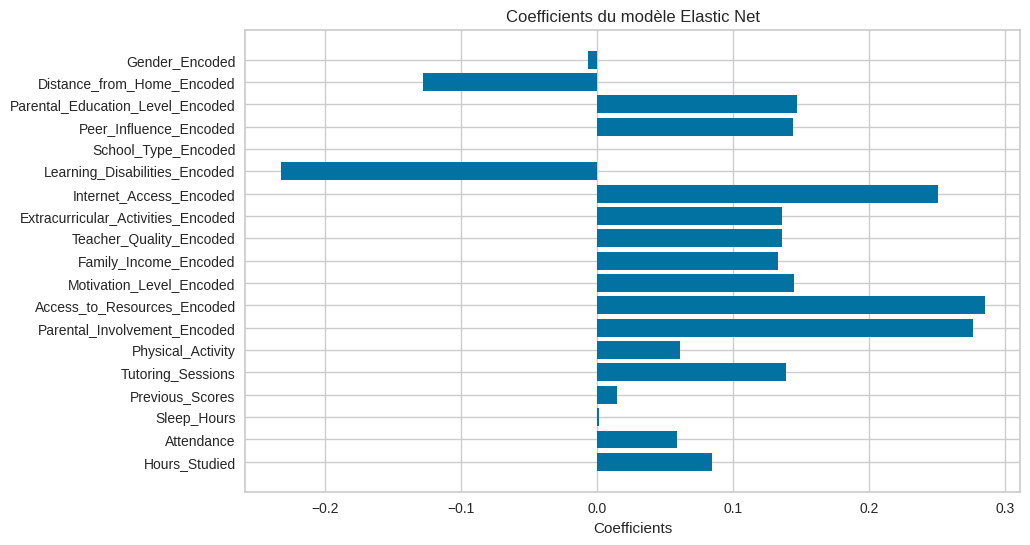

In [33]:
# Visualisation des coefficients
coefficients_elastic_net = elastic_net_best.coef_

plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients_elastic_net)), coefficients_elastic_net, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du modèle Elastic Net')
plt.show()


# **Modéle non lineaire**

KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciation du modèle
knn = KNeighborsRegressor(n_neighbors=5)

# Entraînement du modèle
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# Prédictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Évaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R^2: {r2_train}, Test R^2: {r2_test}")


Train MSE: 0.16901855079183975, Test MSE: 0.2410135553774125
Train R^2: 0.8309814492081602, Test R^2: 0.764195094420159


# **Tuning des hyperparamètres-KNN**

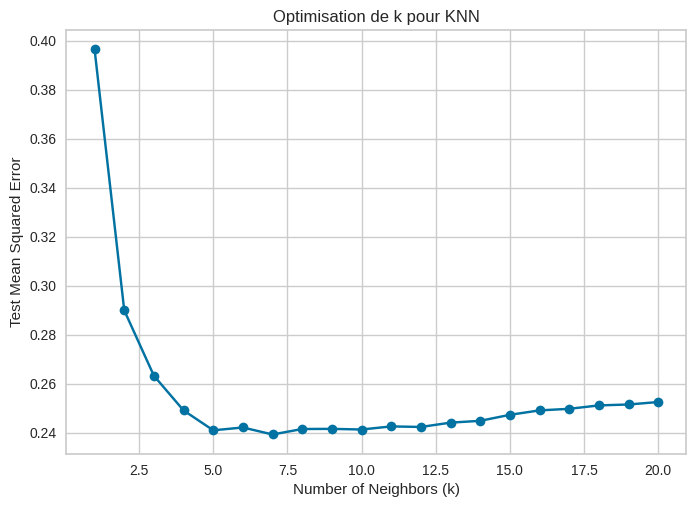

In [36]:
errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_test_pred))

# Visualisation de l'erreur en fonction de k
import matplotlib.pyplot as plt

plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Mean Squared Error")
plt.title("Optimisation de k pour KNN")
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(-scores))

# Meilleur k
best_k = k_values[np.argmin(cv_scores)]
print(f"Meilleur k selon la validation croisée: {best_k}")
cv_scores

Meilleur k selon la validation croisée: 12


[0.4316683228096216,
 0.32227664769545816,
 0.28648413568429926,
 0.2695256981111436,
 0.2642311649921246,
 0.2577304699103795,
 0.2560963317556452,
 0.25405832731122724,
 0.25213799023110056,
 0.2514647352017424,
 0.2510243930247939,
 0.2510030950528965,
 0.25238116630111623,
 0.25312183523032394,
 0.2531928048261051,
 0.2536960444982622,
 0.2538505872758826,
 0.253797694150573,
 0.2539339969065358,
 0.25422960936112776]

# **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


# Initialisation du modèle
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Évaluation des performances
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print(f"Train R^2: {r2_train}, Test R^2: {r2_test}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 0.023674831806560662, Test MSE: 0.16125519505771269
Train R^2: 0.9763251681934393, Test R^2: 0.842229761785397


Le modèle Random Forest montre une forte capacité de prédiction sur l'ensemble d'entraînement, avec un MSE de 0.0237 et un R² de 0.9763, ce qui indique un excellent ajustement aux données d'entraînement. Cependant, sur l'ensemble de test, les performances se dégradent légèrement, avec un MSE de 0.1613 et un R² de 0.8422.

# **Tuning des hyperparamètres-Random Forest et validation croisée**


In [39]:
param_distributions = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [40]:
# Initialiser le modèle
rf = RandomForestRegressor(random_state=42)

# Configurer RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Nombre d'itérations
    cv=5,  # Validation croisée à 5 plis
    scoring='r2',  # Évaluer avec le R^2
    random_state=42,
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Ajuster le modèle
random_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='r2')

In [41]:
# Meilleur modèle
best_rf = random_search.best_estimator_

In [42]:
# Validation croisée R^2 moyen
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2_rf = cv_scores_rf.mean()
std_cv_r2_rf = cv_scores_rf.std()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

## **Rentrainement du modèle avec les meilleurs parametre**

In [43]:
# Réentraîner le modèle sur les données d'entraînement
best_rf.fit(X_train, y_train)

# Prédictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Évaluation
print(f"Validation croisée - R² moyen: {mean_cv_r2_rf:.4f}")
print(f"Validation croisée - Écart-type R²: {std_cv_r2_rf:.4f}")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation croisée - R² moyen: 0.8222
Validation croisée - Écart-type R²: 0.0059
Train MSE: 0.023337100926587192
Test MSE: 0.17414868213923815
Train R^2: 0.9766628990734129
Test R^2: 0.8296149215159648



Après optimisation et validation croisée, le modèle Random Forest montre une excellente performance sur l'ensemble d'entraînement avec un MSE de 0.0233 et un R² de 0.9767, ce qui indique un très bon ajustement aux données d'entraînement. Toutefois, sur l'ensemble de test, les performances sont moins bonnes avec un MSE de 0.1741 et un R² de 0.8296. Cela suggère une légère perte de capacité à généraliser, bien que le modèle reste globalement performant. La validation croisée révèle une stabilité acceptable avec un R² moyen de 0.8222 et un faible écart-type, ce qui indique que le modèle est relativement robuste.

# **BOOSTING**

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entraînement sur les données d'entraînement
gbr.fit(X_train, y_train)

# Prédictions sur le jeu d'entraînement et de test
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Évaluation avec MSE et R^2
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Train MSE: 0.09168806402159088
Test MSE: 0.11998386209891053
Train R^2: 0.9083119359784091
Test R^2: 0.8826091618414015


Le modèle de boosting montre de très bonnes performances sur l'ensemble d'entraînement avec un MSE de 0.0917 et un R² de 0.9083, ce qui indique une bonne capacité d'ajustement aux données d'entraînement. Sur l'ensemble de test, les performances sont légèrement moins bonnes avec un MSE de 0.1200 et un R² de 0.8826, ce qui suggère une légère perte de généralisation.

## **Validation croisée Boosting**

In [45]:

from sklearn.model_selection import cross_val_score

# Initialisation du modèle Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
cv_r2_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='r2')

# Validation croisée à 5 plis
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_squared_error')



# Affichage des résultats
print(f"MSE moyen de la validation croisée (5 plis) : {-cv_scores.mean()}")
print(f"Écart-type de MSE : {cv_scores.std()}")


# Prédictions sur l'ensemble de test
gbr.fit(X_train, y_train)  # On réentraîne le modèle sur l'ensemble complet d'entraînement
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Évaluation avec MSE et R^2 pour l'ensemble d'entraînement et de test
print(f"R^2 moyen de la validation croisée (5 plis) : {cv_r2_scores.mean():.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R^2: {r2_score(y_train, y_train_pred)}")
print(f"Test R^2: {r2_score(y_test, y_test_pred)}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

MSE moyen de la validation croisée (5 plis) : 1.2430128863873904
Écart-type de MSE : 0.08966137165488562


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


R^2 moyen de la validation croisée (5 plis) : 0.8754
Train MSE: 0.09168806402159088
Test MSE: 0.11998386209891053
Train R^2: 0.9083119359784091
Test R^2: 0.8826091618414015


Le modèle de boosting présente un R² moyen de 0.8754 lors de la validation croisée, indiquant une bonne capacité de généralisation. Sur l'ensemble d'entraînement, le modèle obtient un MSE de 0.0917 et un R² de 0.9083, ce qui montre un bon ajustement aux données d'entraînement.

# **CHOIX DU MODELE**

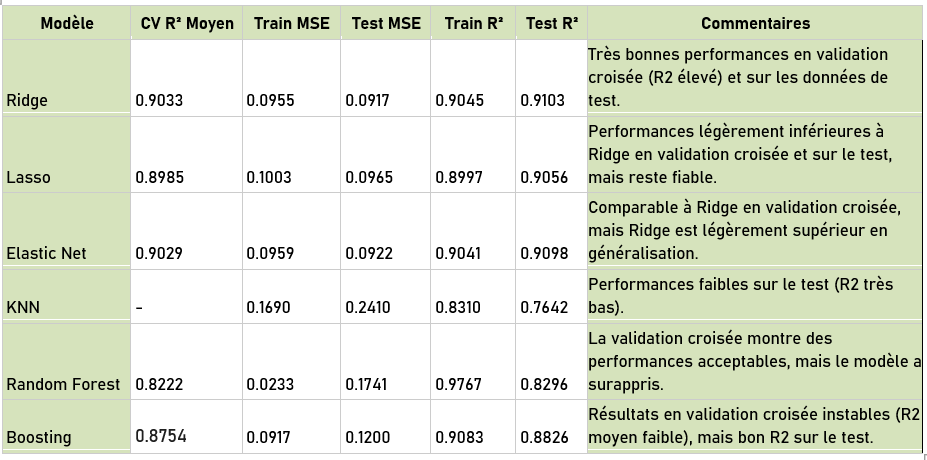

## **Analyse des modèles**

**Ridge Regression :**

Score moyen en validation croisée
***𝑅2=0.9033*** le plus élevé parmi tous les modèles, indiquant une très bonne généralisation.

Performances solides sur les données de test (
***𝑅2=0.9103***), confirmant la stabilité du modèle.

**Lasso et Elastic Net :**

Résultats proches de Ridge, mais légèrement inférieurs en validation croisée et sur le test. Si la régularisation supplémentaire est critique, ces modèles peuvent être envisagés.

**Random Forest :**

Validation croisée moyenne (***𝑅2=0.8222***), indiquant une certaine capacité à généraliser. Toutefois, le modèle souffre d’un surapprentissage marqué (
***𝑅2*** élevé sur l’entraînement, faible sur le test).

**Boosting :**

Validation croisée montre une instabilité (MSE moyen très élevé). Cependant, le modèle performe bien sur les données de test (
***𝑅2=0.8826***), suggérant une utilité limitée selon le contexte.

### **Meilleur modèle : Ridge Regression**
Le Ridge Regression se distingue par ses :

Excellentes performances en validation croisée (
𝑅2=0.9033).

Très bons résultats sur le test (
𝑅2=0.9103), garantissant une généralisation optimale.

# **Importance des variables- RIDGE**

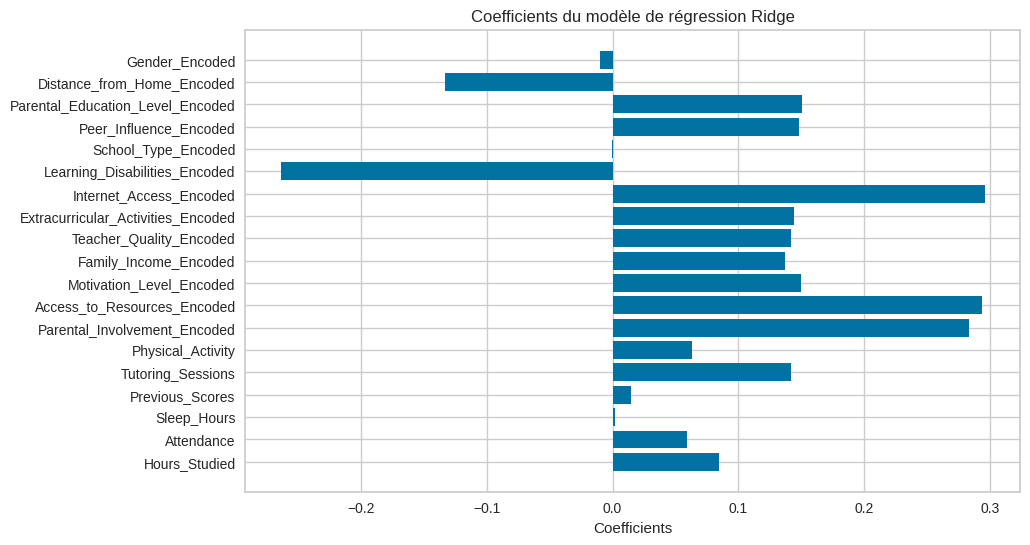

In [46]:
# Creating a bar plot to visualize coefficients
coefficients = ridge.coef_.ravel()  # Flatten the coefficients array
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=X_train.columns)
plt.xlabel('Coefficients')
plt.title('Coefficients du modèle de régression Ridge')
plt.show()

### **Selection des variables les plus essentielles**

Pour le déploiement de notre modèle, nous allons selectionner les variables qui ont un coefficient supérieur a 0.10. Après cela, nous allons reentrain nos modèle pour voir si le modéle Ridge sera toujours le plus performant et robuste.

Variables sélectionnées avec un seuil de 0.1:
                              Variable  Coefficient
4                    Tutoring_Sessions     0.141508
6         Parental_Involvement_Encoded     0.283524
7          Access_to_Resources_Encoded     0.293395
8             Motivation_Level_Encoded     0.149461
9                Family_Income_Encoded     0.136903
10             Teacher_Quality_Encoded     0.141870
11  Extracurricular_Activities_Encoded     0.144456
12             Internet_Access_Encoded     0.296062
13       Learning_Disabilities_Encoded    -0.263821
15              Peer_Influence_Encoded     0.148148
16    Parental_Education_Level_Encoded     0.150471
17          Distance_from_Home_Encoded    -0.132973


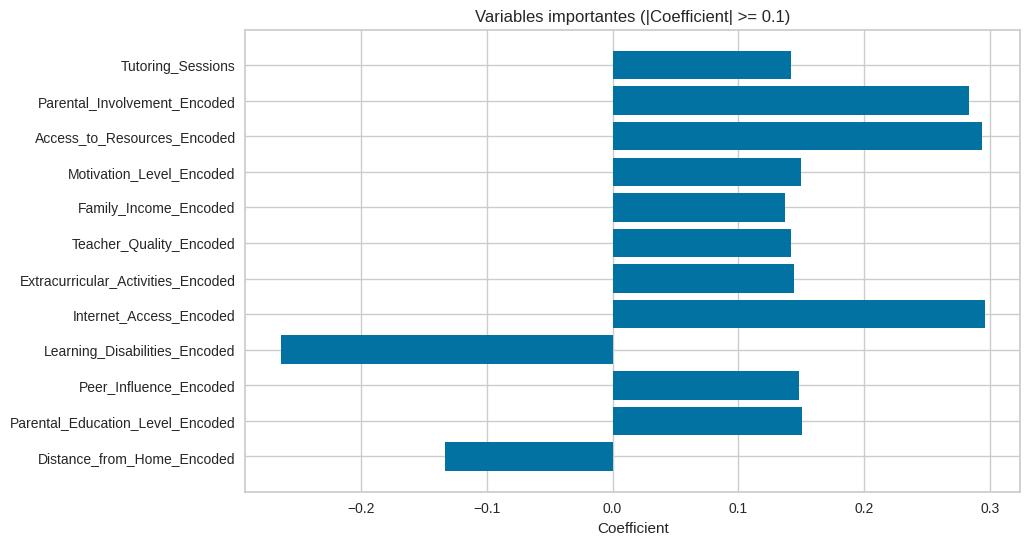

In [50]:
# Choix du seuil
seuil = 0.10  #  pour sélectionner les variables ayant |Coefficient| >= 0.10

# Calcul des coefficients et des noms des variables
coefficients = ridge.coef_.ravel()  # Aplatir si nécessaire
feature_names = X_train.columns

# Associer les noms des variables et leurs coefficients dans un DataFrame
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Coefficient': coefficients
})

# Filtrer les variables basées sur le seuil
importance_df['Importance'] = importance_df['Coefficient'].abs()
selected_features = importance_df[importance_df['Importance'] >= seuil]

# Affichage des variables sélectionnées
print(f"Variables sélectionnées avec un seuil de {seuil}:")
print(selected_features[['Variable', 'Coefficient']])

# Visualisation des variables sélectionnées
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Variable'], selected_features['Coefficient'])
plt.xlabel('Coefficient')
plt.title(f'Variables importantes (|Coefficient| >= {seuil})')
plt.gca().invert_yaxis()
plt.show()


**Reentraiment de notre modele Ridge avec ces variables**

In [51]:
# Liste des colonnes retenues
selected_columns = [
    'Tutoring_Sessions',
    'Parental_Involvement_Encoded',
    'Access_to_Resources_Encoded',
    'Motivation_Level_Encoded',
    'Family_Income_Encoded',
    'Teacher_Quality_Encoded',
    'Extracurricular_Activities_Encoded',
    'Internet_Access_Encoded',
    'Learning_Disabilities_Encoded',
    'Peer_Influence_Encoded',
    'Parental_Education_Level_Encoded',
    'Distance_from_Home_Encoded'
]

# Filtrer les données
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]


In [52]:

best_alpha=0.10
# Initialiser le modèle Ridge avec le meilleur alpha
ridge_retrained = Ridge(alpha=best_alpha)  # Remplacez `best_alpha` par votre valeur trouvée

# Réentraîner le modèle
ridge_retrained.fit(X_train_selected, y_train)

# Prédictions
y_train_pred = ridge_retrained.predict(X_train_selected)
y_test_pred = ridge_retrained.predict(X_test_selected)


In [54]:


# Calcul des métriques
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Train MSE: 0.8330314609913633
Test MSE: 0.8655530276027145
Train R^2: 0.16696853900863673
Test R^2: 0.15315281902466915


In [62]:


# Validation croisée pour MSE
cv_scores_mse = cross_val_score(ridge_retrained, X_train_selected, y_train,
                                 scoring='neg_mean_squared_error', cv=5)

# Validation croisée pour R²
cv_scores_r2 = cross_val_score(ridge_retrained, X_train_selected, y_train,
                               scoring='r2', cv=5)

# Affichage des résultats
print(f"MSE moyen de la validation croisée : {-cv_scores_mse.mean()}")
print(f"Écart-type du MSE : {cv_scores_mse.std()}")
print(f"R² moyen de la validation croisée : {cv_scores_r2.mean()}")
print(f"Écart-type du R² : {cv_scores_r2.std()}")


MSE moyen de la validation croisée : 0.8381983315566371
Écart-type du MSE : 0.016141727809390875
R² moyen de la validation croisée : 0.161066088893219
Écart-type du R² : 0.008305485495629506


Les résultats de la validation croisée du modèle Ridge montrent un MSE moyen de 0.8382, ce qui indique une erreur relativement élevée sur les données de validation, suggérant une capacité limitée à prédire avec précision. Le R² moyen de 0.1611 est faible, ce qui signifie que le modèle explique peu de la variance des données de validation, malgré des performances raisonnables sur les ensembles d'entraînement et de test. L'écart-type du MSE (0.0161) et du R² (0.0083) étant faibles, cela indique une stabilité des résultats à travers les plis de validation. Cependant, cette faible performance en validation met en évidence des difficultés de généralisation du modèle.

**Reentraiment de notre modele Lasso avec ces variables**

In [59]:

# Initialiser le modèle LASSO avec le meilleur alpha
lasso_retrained = Lasso(alpha=0.01, max_iter=10000)
# Réentraîner le modèle
lasso_retrained.fit(X_train_selected, y_train)

# Prédictions
y_train_pred = lasso_retrained.predict(X_train_selected)
y_test_pred = lasso_retrained.predict(X_test_selected)


In [60]:

# Calcul des métriques
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Train MSE: 0.8376137008991348
Test MSE: 0.8690091137100019
Train R^2: 0.16238629910086522
Test R^2: 0.14977142391214726


**Validation croisée Lasso**

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Créer le modèle LASSO avec le meilleur alpha
lasso_retrained = Lasso(alpha=best_alpha_lasso, max_iter=10000)

# Validation croisée pour MSE
cv_mse_scores = cross_val_score(lasso_retrained, X_train_selected, y_train,
                                 scoring='neg_mean_squared_error', cv=5)

# Validation croisée pour R^2
cv_r2_scores = cross_val_score(lasso_retrained, X_train_selected, y_train,
                                scoring='r2', cv=5)

# Affichage des résultats de la validation croisée
print(f"MSE moyen de la validation croisée : {-cv_mse_scores.mean()}")
print(f"Écart-type de MSE : {cv_mse_scores.std()}")
print(f"R² moyen de la validation croisée : {cv_r2_scores.mean()}")
print(f"Écart-type de R² : {cv_r2_scores.std()}")


MSE moyen de la validation croisée : 0.8427666894365284
Écart-type de MSE : 0.017354929085185936
R² moyen de la validation croisée : 0.15652875084025308
Écart-type de R² : 0.006951487501648368


Le modèle **LASSO** après la sélection des variables pertinentes a montré des performances relativement limitées en validation croisée. Le MSE moyen de 0.8428 indique une erreur quadratique moyenne élevée, suggérant que le modèle peine à faire des prédictions précises. Le R² moyen de 0.1565 indique que seulement 15,65 % de la variance des données cibles est expliquée par le modèle, ce qui est un score relativement faible. L'écart-type du MSE (0.0173) et du R² (0.00695) montre une certaine stabilité des performances à travers les plis, mais la capacité de généralisation reste insuffisante.

# **finalement est ce qu'on ne va pas mettre toutes les variables pour la prédiction ?**